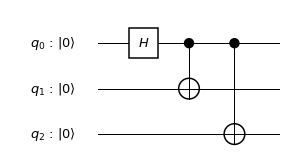

In [1]:
# We are going to be recreating the same experiment as in the past tutorial, so we will use the same commands:
import numpy as np
from qiskit import *
%matplotlib inline

#Now we create te qubits and the circuit
q = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)

#And we apply the gates
circ.h(q[0])
circ.cx(q[0], q[1])
circ.cx(q[0], q[2])

#We will show the circuit too to keep track of what we are doing
circ.draw(output='mpl')

In [2]:
# So far we have only studied the input of the system, i.e. the circuit
# A real experiment will take into account the measure of the system
# In order to that we have to consider probabilities as we do in quantum mechanics
# We first need to host the information of our experiments as classical bits
# In order to do that we use the command

c = ClassicalRegister(3, 'c')

In [3]:
# Now we need to create the measuring circuit

meas = QuantumCircuit(q, c)

# It is made of the qubits q and the classical bits c
# To separate this part of the circuit with the previus one we create a barrier

meas.barrier(q)

In [4]:
# Finally, to measure the system we just have to run the following command
meas.measure(q,c)


In [5]:
# We now can add the two circuits we have, the qubit and the classical bits
# In order to do that we have to first create the whole circuit

qc = circ + meas

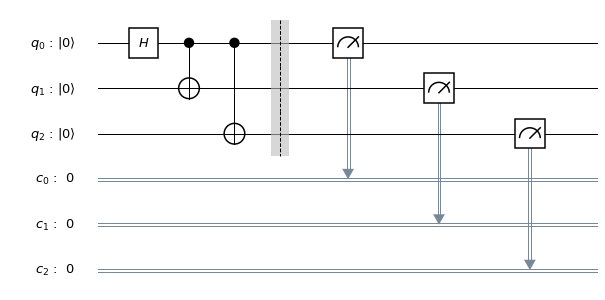

In [7]:
# Once the whole circuit is made, drawing it is as symple as in part 1

qc.draw(output='mpl')

In [8]:
# Now we have to find our backend
# Since we are just simulating (we are not using a quantum computer)
# we can use the simulator backend provided by Aer

backend = BasicAer.get_backend('qasm_simulator')

# This simulator will allow us to run the experiment several times

In [38]:
# Now we have our backend, as we did in the previous tutorial we have to asign the backend a job
# In this case, in the job command we have to specify the number of experiments
# To do that we use the command "shots"
# Remember that to run a job we have tu specify the circuit and the backend

job = execute(qc, backend, shots=1024)

# We want the number of shots to be 2^n
# But we can run the experiment the number of times we want

In [39]:
# Now, to get the results we simply run the following command

result = job.result()

In [40]:
# And to obtain the number of counts each of the bits have been measured
# we need to extract that information from the result object
# That is, we use:

counts = result.get_counts(qc)

In [41]:
# And finally, to print the counts we do:

print(counts)

{'111': 514, '000': 510}


In [42]:
# Everytime we run the simulation we get a different number of counts
# However, it is easy to see that the chances of each result is 50% as expected
# To plot those results we have to get the visual packages as we did in previous tutorial

from qiskit.visualization import *

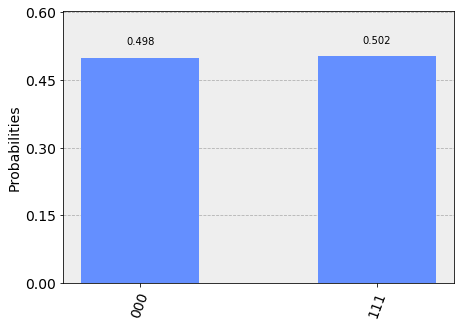

In [43]:
# And now we just have to run a histogram

plot_histogram(counts)

In [44]:
# Easy to see the 50% proportion of each one of the states
# So far we have used simulations to study the system
# Next step is to test the circuits in actual quantum circuits